In [1]:
# From python
from collections import Counter
# Thirds Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

## Carga de Datos
> Cargar y mostrar los datos contenidos en el dataset.

In [2]:
# Variable de archivo.
file_path = 'BBDD_Hospitalización.xlsx'

# Carga de datos mediante CSV
datos = pd.read_excel(file_path)
datos.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


> Se cargo el data set con pandas para tener un mejor manejo y una mejor visualizacion de los datos antes de poder elegir y configurar el modelo.

## Exploracion  de los datos

> Exploracion de los datos: explorar la estructura del dataset para identificar tipos de datos y valores nulos.

In [3]:
# Detalle de los datos comprendidos en el dataset.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

> en el analisis general observamos que contamos con 15 variables categoricas y 5 variables numericas en el data set, asi como tambien multiples valores faltantes en el mismo.

## Analisis del comportamiento de las variables Categoricas.

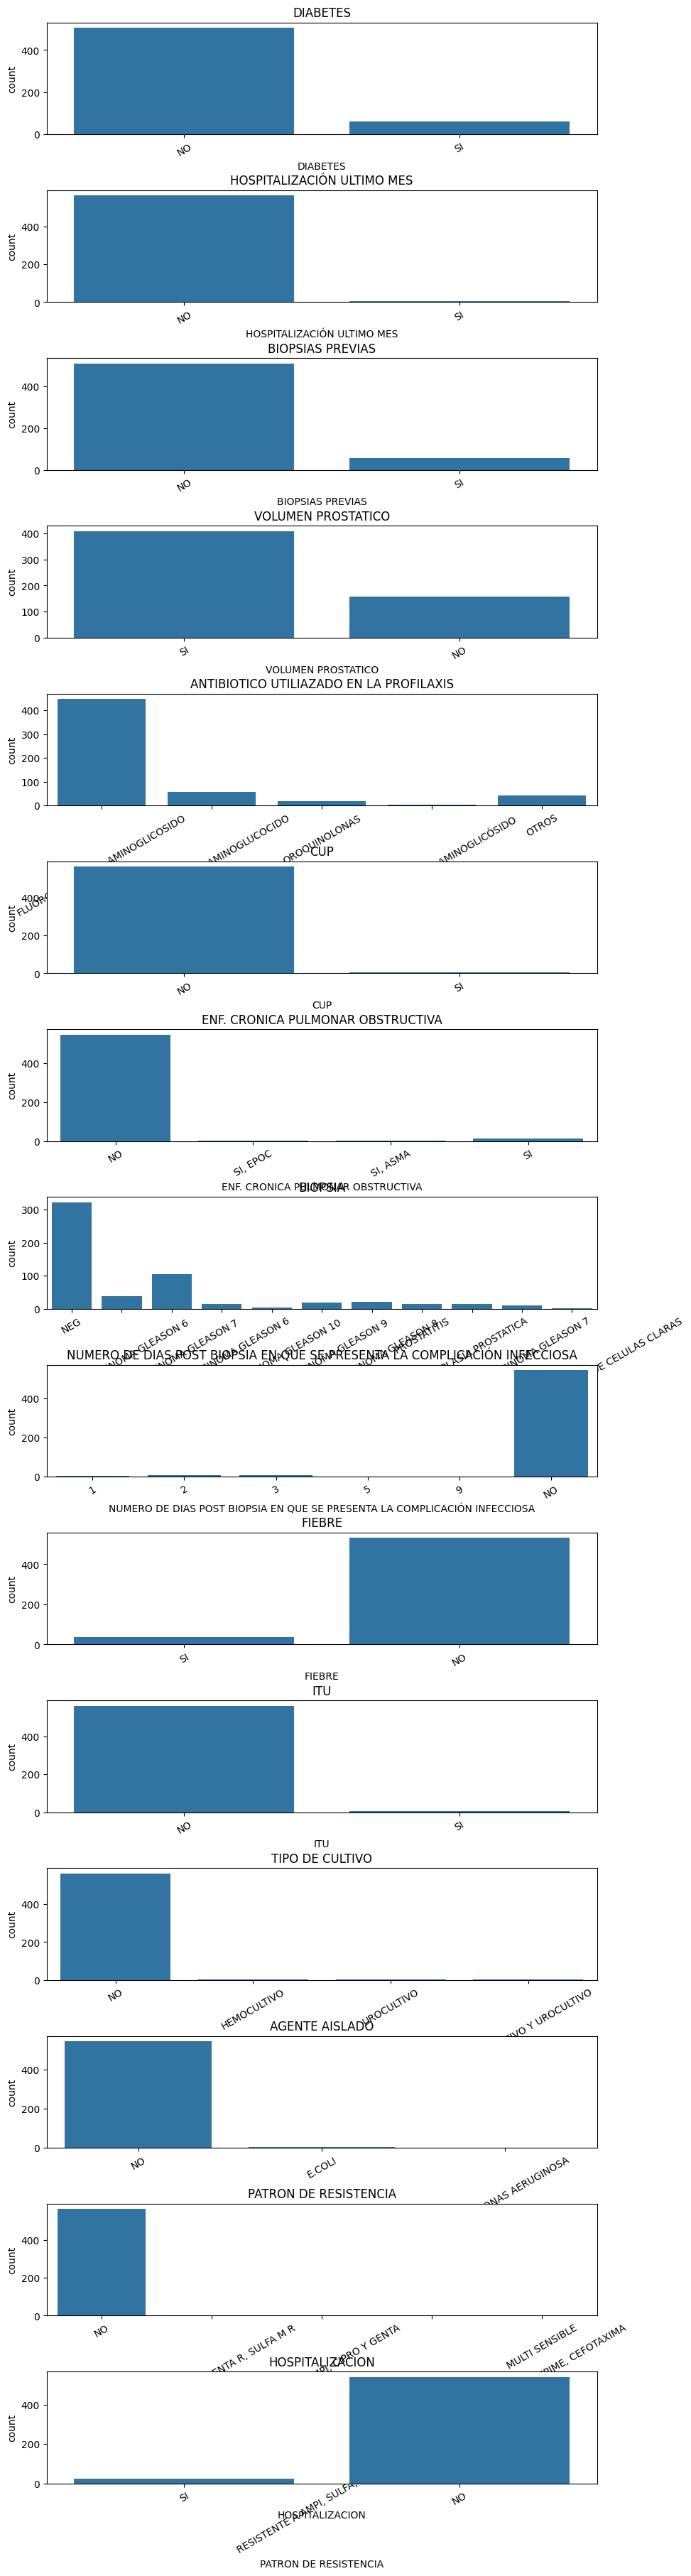

In [4]:
# listado de variables categoricas guardada en variable
columnas_categoricas = ['DIABETES','HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
                        'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
                        'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE','ITU','TIPO DE CULTIVO',
                        'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
                        ]

# Subplots para visualizar el comportamiento de las variables.
fig, ax = plt.subplots(nrows=len(columnas_categoricas), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col, data=datos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

> En este punto podemos determinar que contamos con varias variables categoricas de tipo binarias las cuales nos podrian presentar una facilidad de manejo al convertirlas a numericas, a su vez podemos ver tambien cuales podemos convertir a dummies.

> tambien existen variables con mas de dos clases que pueden normalizarse abinarias y ser convertidas a numericas.

### Descripcion de variables numericas del dataset.

In [5]:
# Evaluacion de los datos numericos del dataset.
datos.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


> en el siguiente analisis de las variables numericas se pueden observar en edad y PSA, valores atipicos que afectan a la media del los valores.

#### Tratamiento de Valores nulos

In [6]:
# Valores nulos que tenemos en el dataset
datos.isnull().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

## Limpieza de los datos
> Limpiar los datos: se limpiaran los valores nulos y se convertiran los tipos de datos si es necesario.

<Axes: xlabel='HOSPITALIZACION', ylabel='count'>

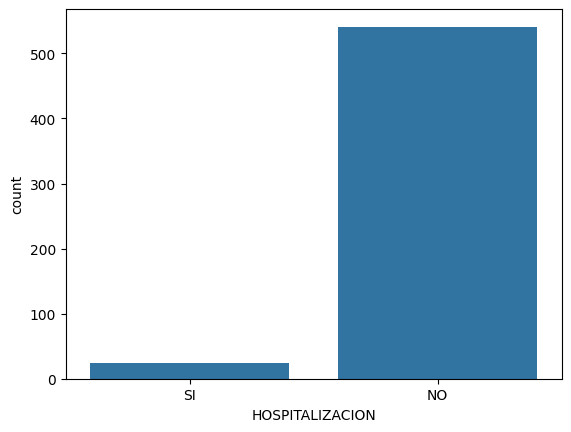

In [8]:
sns.countplot(x='HOSPITALIZACION', data=datos)

> en el analisis del problema y el requerimiento de la empresa se llego a la decision de tomar la variable Hospital como nuestra Y, por lo que se procede a evaluar de manera mas detallada sus datos, observando que se tiene un desbalance importante en ella.

## Drop de columnas

In [9]:

# Guardar el nombre de las columbas en una variable
drop_columns = ['EDAD', 'HOSPITALIZACIÓN ULTIMO MES','PSA','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 
                'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA','DIAS HOSPITALIZACION MQ',
                'DIAS HOSPITALIZACIÓN UPC','DIABETES', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS']

# Drop de las columnas y se guarda el resultado en la variable datos.
datos = datos.drop(columns=drop_columns)

datos

,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,NEG,1,SI,NO,NO,NO,NO,SI
1,NEG,1,SI,NO,NO,NO,NO,SI
2,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,NEG,1,SI,NO,NO,NO,NO,SI
4,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...
565,NEG,NO,NO,NO,NO,NO,NO,NO
566,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO
567,NEG,NO,NO,NO,NO,NO,NO,NO
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Quedarian en total a este punto 8 variables.

> Se realiza la eliminacion de las columnas con baja correlacion en para las predicciones, esta evaluacion se realiza lineas mas abajo, debido a que antes de hacer el analisis de correlacion deben convertirse varias de categoricas a numericas, pero se procede a escribir el paso en este nivel del codigo para que sea mas eficiente al momento de correrse.

## Drop de filas con espacios Vacios y normalizacion de datos a binarios

In [10]:
# Eliminar filas con datos vacios.
datos = datos.dropna()

# normalizar datos de las filas reemplazando los valores.
datos['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0, inplace=True)

> Mediante Dropna se procede a eliminar filas con datos vacios  evaluados previamente, a su vez se hace la normalizacion de algunas colunas categoricas en binario.

### Verificacion de datos vacios o nulos

In [11]:
# Verificar si existe algun dato vacio o nulo en las columnas.
datos.isnull().sum()

BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                                                       0
ITU                                                                          0
TIPO DE CULTIVO                                                              0
AGENTE AISLADO                                                               0
PATRON DE RESISTENCIA                                                        0
HOSPITALIZACION                                                              0
dtype: int64

#### Verificar datos de columna: HOSPITALIZACION

In [12]:
datos[(datos['HOSPITALIZACION']!='NO')&( datos['HOSPITALIZACION']!='SI')]

,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION


## Conversion de los datos
> Reemplazar variables categoricas binarias 'Si' y  'NO' con 1 y 0

In [13]:

# Variable para las columnas que se pasaran a True y False.
columnas_binarias = ['FIEBRE', 'ITU', 'HOSPITALIZACION']

for columna in columnas_binarias:
    datos[columna] = datos[columna].map({'SI':1, 'NO':0})

datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 567
Data columns (total 8 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   BIOPSIA                                                                    548 non-null    object
 1   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  548 non-null    int64 
 2   FIEBRE                                                                     548 non-null    int64 
 3   ITU                                                                        548 non-null    int64 
 4   TIPO DE CULTIVO                                                            548 non-null    object
 5   AGENTE AISLADO                                                             548 non-null    object
 6   PATRON DE RESISTENCIA                                                   

> Mediante un mapeo con el metodo map() de pandas se procede a reemplazar las clases categoricas de las columnas por datos numerico para poder cargarlos al modelo y se verifica como han quedado los datos.

## Transformar y preparar los datos
> Transformaciones adicionales, como la creación de variables dummie para variables categóricas.

In [14]:
# Variable para las columnas que pasaran a dimmies.
columnas_dummies = ['TIPO DE CULTIVO', 'BIOPSIA', 'AGENTE AISLADO','PATRON DE RESISTENCIA'
                ]

# pasar los datos a tipo dummie pasandole la variable columnas_dummies creada anteriormente.
datos = pd.get_dummies(datos, columns=columnas_dummies,
                        drop_first=True
                        )

datos

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,...,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,1,1,0,1,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,1,1,0,1,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
2,1,1,0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,1,0,1,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
4,1,1,0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,0,0,0,0,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
563,0,0,0,0,False,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
564,0,0,0,0,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
565,0,0,0,0,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False


> Con la funcion Get_dummies() de pandas se procede a convertir las columnas categoricas restantes a dummies para poder trabajar con el modelo escogido.

## Analisis de correlacion

In [15]:
corr = datos.corr()
corr['HOSPITALIZACION'].sort_values(ascending=False)


HOSPITALIZACION                                                                                          1.000000
FIEBRE                                                                                                   0.688719
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA                                0.632040
ITU                                                                                                      0.491627
TIPO DE CULTIVO_UROCULTIVO                                                                               0.400673
PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA                                                   0.282800
PATRON DE RESISTENCIA_MULTI SENSIBLE                                                                     0.282800
AGENTE AISLADO_PSEUDOMONAS AERUGINOSA                                                                    0.282800
PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIM

### Diagrama de correlacion de variables.

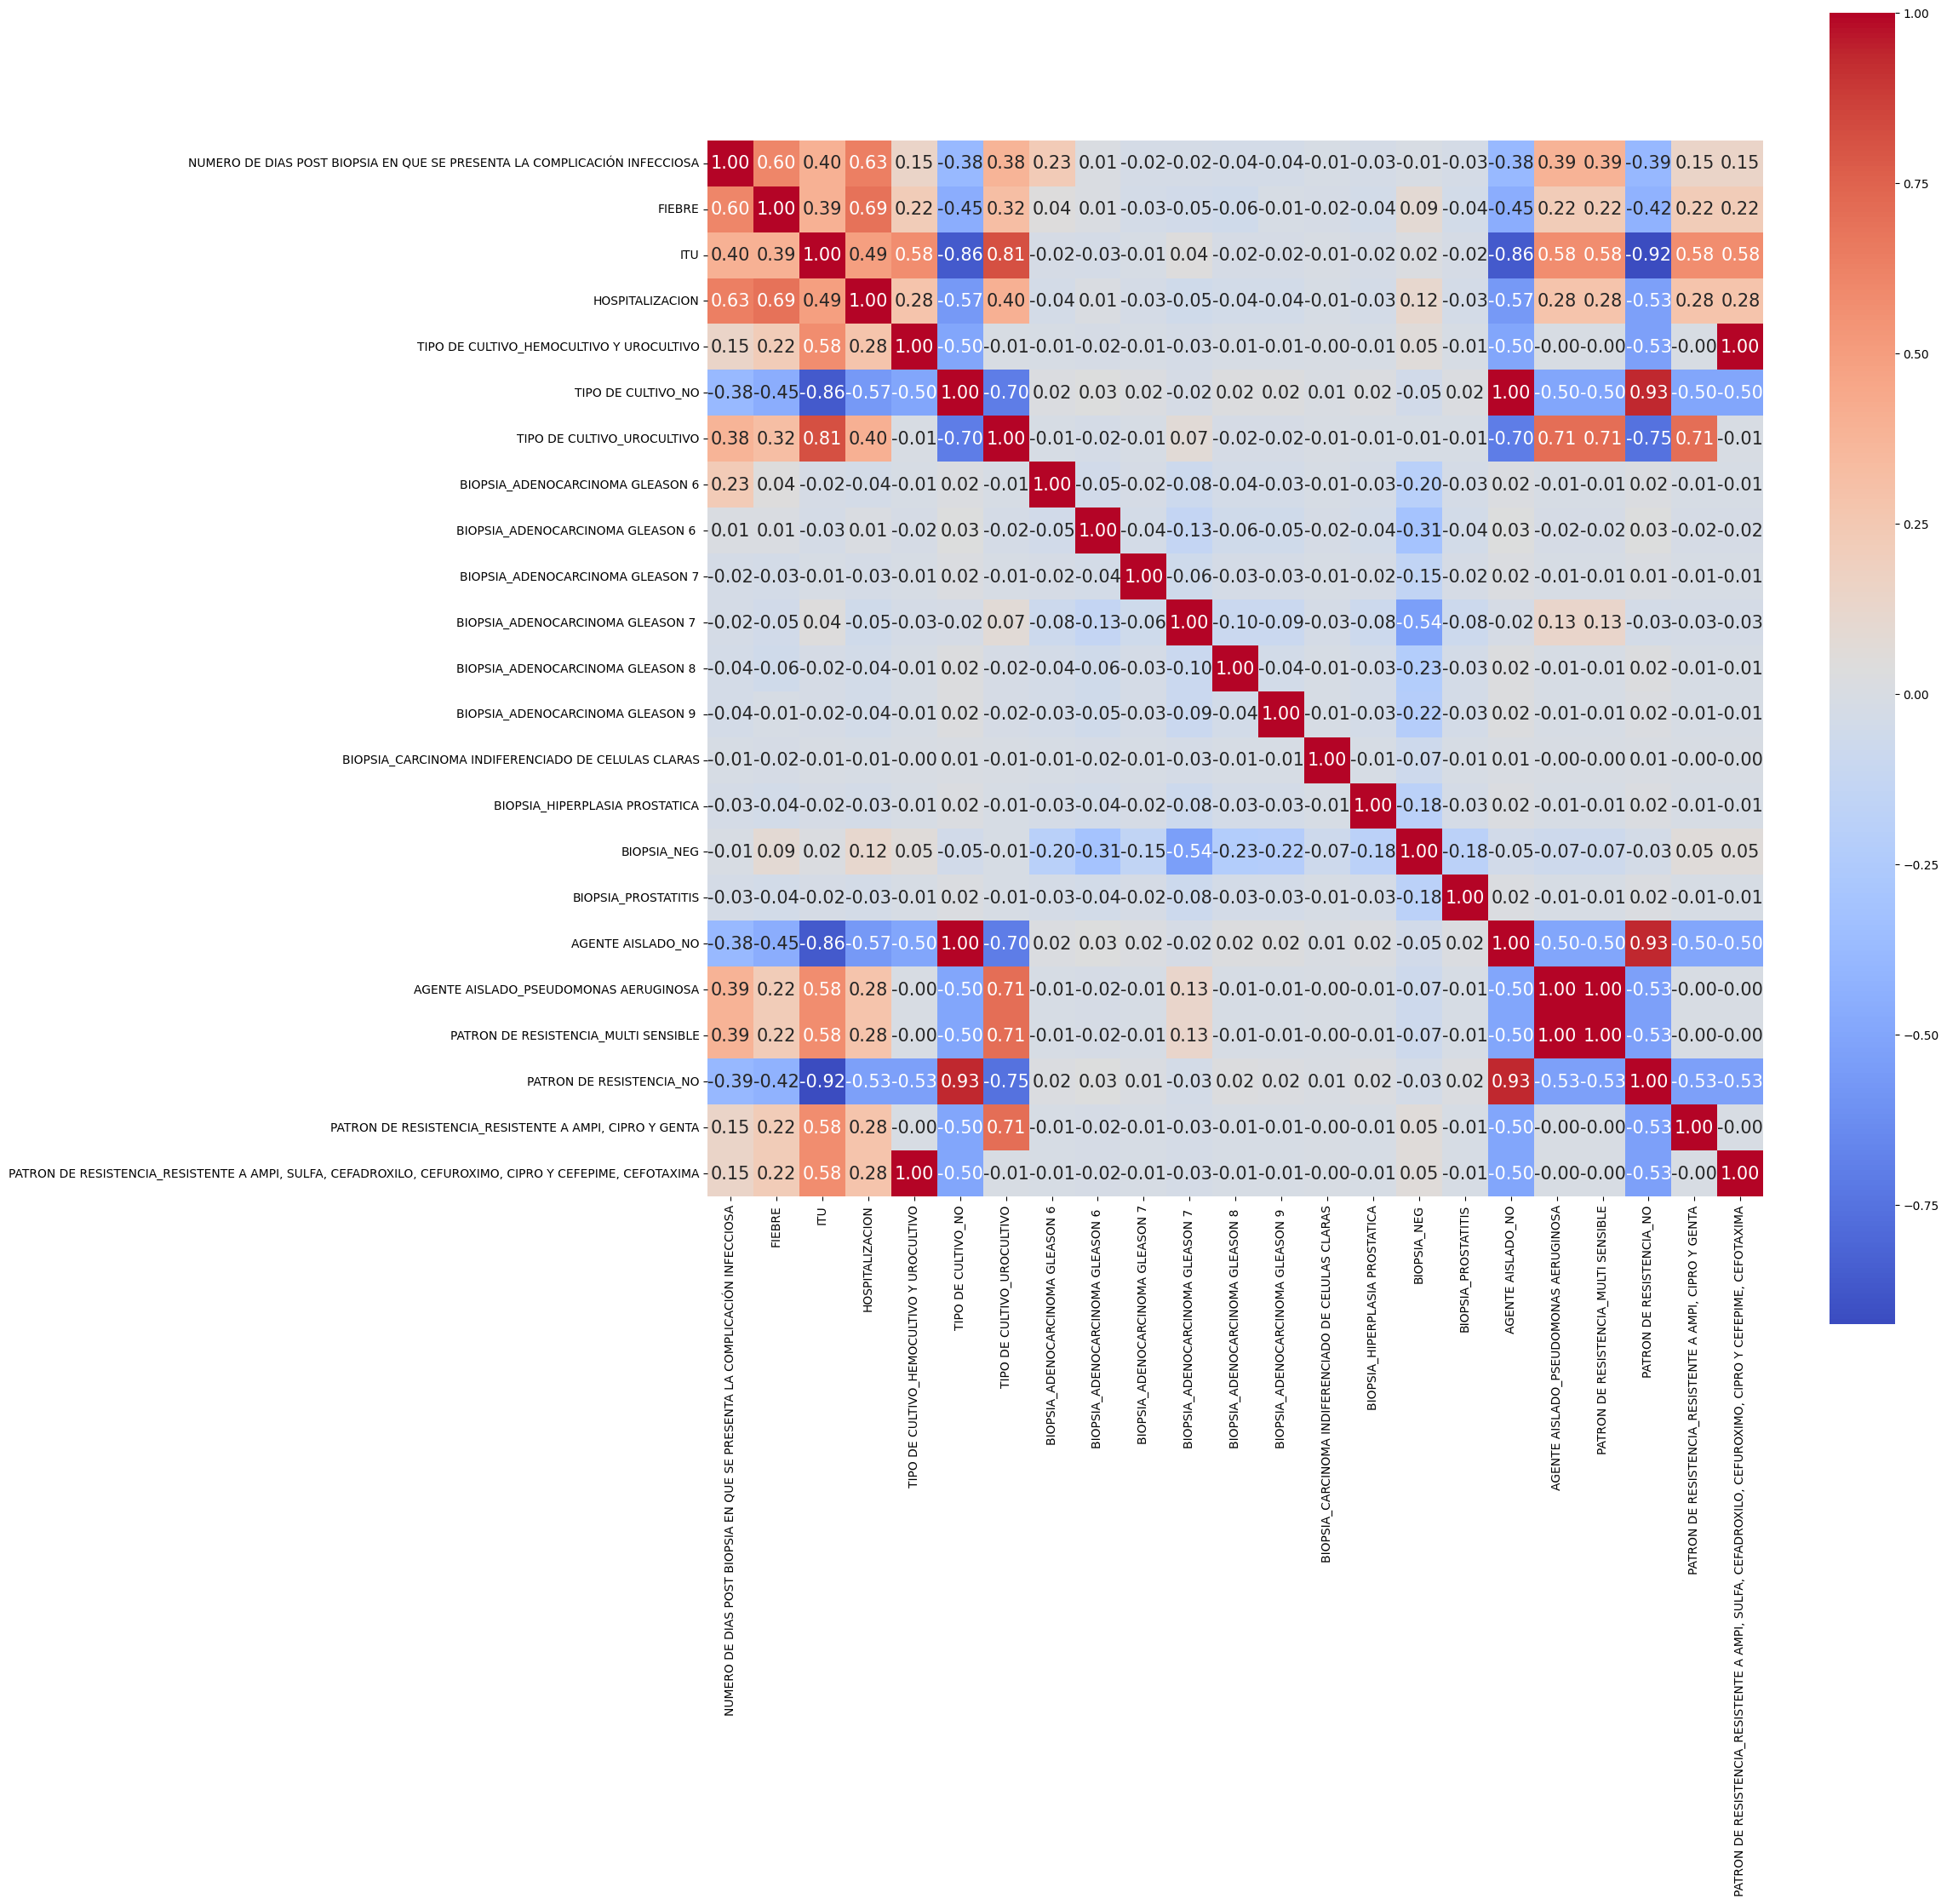

In [16]:
# Variable con correlacion de datos desde el Dataset con pandas.
corr = datos.corr()

# Diagaramado con matplotlib y Seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datos.columns, 
           yticklabels= datos.columns,
           cmap= 'coolwarm')
plt.show()

> se realiza mediante el metodo corr() de pandas un analisis de correlacion con respecto a la variable HOSPITALIZACION con el fin de evaluar cuales variables darian mejores resultados y a su vez reducir la complejidad del modelo a elaborar (segun esta evaluacion se realiza un drop de dichas columnas unos pasos mas arriba en el codigo).

### Verificacion rapida de que los datos estan sin valores nulos.

In [17]:
datos.isnull().sum()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA                                0
FIEBRE                                                                                                   0
ITU                                                                                                      0
HOSPITALIZACION                                                                                          0
TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO                                                                 0
TIPO DE CULTIVO_NO                                                                                       0
TIPO DE CULTIVO_UROCULTIVO                                                                               0
BIOPSIA_ADENOCARCINOMA GLEASON 6                                                                         0
BIOPSIA_ADENOCARCINOMA GLEASON 6                                                                         0
BIOPSIA_ADENOCARCINOMA GLEASON 7     

## Implementación del Modelo para la prediccion.
<p>Finalmente, implementamos el modelo de regresión logística utilizando las variables seleccionadas.</p>

## Preparacion de los daros para aplicar los modelos.
> Seleccion, balanceo y Split de datos de entrenamiento y datos de testing

In [18]:
# Seleccionar variables para X e y.
X = datos.drop('HOSPITALIZACION', axis=1)
y = datos['HOSPITALIZACION']


> De acuerdo al analisis previo se determino que la variabla a utilizar en 'Y' seria 'HOSPITALIZACION'

In [19]:
# Instancia de Smote
smote = SMOTE()
# se realiza un conteo en la variable y_train para verificar la cantidad de datos al inicio
conteo_i1 = Counter(y)
conteo_i1

#  Se hace el balanceo en los datos para el testeo y el train
X_train, y_train = smote.fit_resample(X,y)

# conteo final de la variable y
conteo_i2 = Counter(y_train)
conteo_i2


print(f'conteo train antes {conteo_i1}')
print(f'conteo train despues {conteo_i2}')

conteo train antes Counter({0: 524, 1: 24})
conteo train despues Counter({1: 524, 0: 524})


> Debido al desbalance en 'Y' se generan datos sinteticos con SMOTE()

In [20]:
# Se selecciona del total de los datos un 20% para el testeo y un 80% para el entrenamiento del modelo. 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.2, random_state=1990)

> Se dividen los datos en X y Y train y X y Y test, para el entrenamiento y el testeo del modelo.

### Escalado de los datos.

In [21]:
# Estandarizar los datos.
# scaler = StandardScaler()

# from sklearn.model_selection import KFold, cross_val_score

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

> Con el fin de mantener una media de 0 y una desviacion estandar de 1 se realiza un escalado de datos para que de esta manera nuestro modelo pueda ser entrenado de manera mas eficiente.

## probar diferentes modelos.

In [22]:
# Variable con las listas de elementos
modelos = []
resultados = []
nombres_modelos = []

# Agregar Modelos a las listas
modelos.append(('Regresion Logistica', LogisticRegression()))
modelos.append(('Arbol de Decision', DecisionTreeClassifier()))
modelos.append(('Bosque de Clasificacion', RandomForestClassifier()))

In [23]:
# For para instanciar los modelos con cross_val_score y obtener los parametros de manera individual
for nombre_modelo, model in modelos:
    kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=1990)
    resultados_cross_value = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    nombres_modelos.append(nombre_modelo)
    resultados.append(resultados_cross_value)

# imprimir resultado de modelos.
for i in range(len(nombres_modelos)):
    print(nombres_modelos[i], resultados[i].mean())

Regresion Logistica 0.9975845410628019
Arbol de Decision 0.9987922705314011
Bosque de Clasificacion 1.0


> el mejor resultado en este punto lo arroja el modelo de regresion logistica, por lo que se sera el modelo que se utilice para la predicion.

## Se implementó un modelo de regresión logística para predecir la hospitalización de los pacientes basándose en las características seleccionadas
>Crear Pipeline para agilizar el flujo de trabajo.

In [24]:
# crear Pipeline
modelo = Pipeline((
    ('scale', StandardScaler()), ('log_reg', LogisticRegression(C=10, solver='lbfgs', n_jobs=-1,fit_intercept=True))
))

modelo.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('log_reg', LogisticRegression(C=10, n_jobs=-1))])

> Prueba de modelo

In [25]:
y_fit = modelo.predict(X_test)

> Reporte General del modelo con datos que no conoce.

In [26]:
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       102

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



>  Reporte general y Matriz de Confusion

In [27]:
matriz = confusion_matrix(y_test, y_fit)
matriz

array([[108,   0],
       [  0, 102]], dtype=int64)

> Como se puede evaluar el modelo tiene un excelente comportamiento, en la evaluacion de los datos que no conoce ha acertado en todas las prediciones.

### conclusion:

<p>El modelo de regresión logística implementado permitió identificar las características más relevantes asociadas a la hospitalización post biopsia prostática. La precisión del modelo fue evaluada y se presentaron métricas clave como la matriz de confusión y el informe de clasificación. Este análisis proporciona una base sólida para la toma de decisiones en la atención y seguimiento de pacientes sometidos a biopsia prostática tomando en cuenta las siguientes caracteristicas:</p>
<ul>
    <li>BIOPSIA</li>
    <li>NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA </li>
    <li>FIEBRE</li>
    <li>ITU</li>
    <li>TIPO DE CULTIVO</li>
    <li>AGENTE AISLADO</li>
    <li>PATRON DE RESISTENCIA</li>
 </ul>